## Manahil Fatima Anwar
## 20K-0134
## BAI-7A
## CV Lab 07

(-0.5, 247.5, 202.5, -0.5)

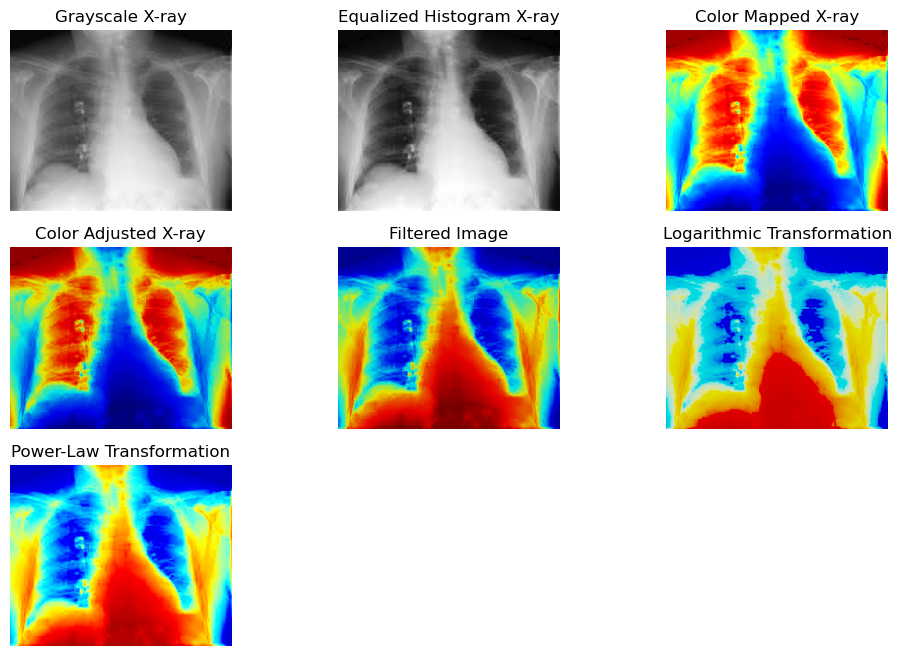

In [1]:
# task 01
import cv2
import matplotlib.pyplot as plt

image_path = "Image_task 01.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(12, 8))
plt.subplot(3, 3, 1)
plt.title("Grayscale X-ray")
plt.imshow(image, cmap = 'gray')
plt.axis("off")

equalized_image = cv2.equalizeHist(image)
plt.subplot(3, 3, 2)
plt.title("Equalized Histogram X-ray")
plt.imshow(equalized_image, cmap = 'gray')
plt.axis("off")

colormap_image = cv2.applyColorMap(equalized_image, cv2.COLORMAP_JET)
plt.subplot(3, 3, 3)
plt.title("Color Mapped X-ray")
plt.imshow(colormap_image)
plt.axis("off")

import numpy as np
blue_scale = 0.9
green_scale = 0.9
red_scale = 0.9
adjusted_image = np.clip(colormap_image * [blue_scale, green_scale, red_scale], 0, 255).astype(np.uint8)
plt.subplot(3, 3, 4)
plt.title("Color Adjusted X-ray")
plt.imshow(adjusted_image)
plt.axis("off")

rgb = cv2.cvtColor(adjusted_image, cv2.COLOR_BGR2RGB)
lower_color = np.array([0, 0, 0])
upper_color = np.array([230, 250, 229])
mask = cv2.inRange(adjusted_image, lower_color, upper_color)
filtered_image = cv2.bitwise_and(rgb, rgb, mask=mask)
plt.subplot(3, 3, 5)
plt.title("Filtered Image")
plt.imshow(filtered_image)
plt.axis("off")

c = 225 / np.log(1 + np.max(filtered_image))
log_transformed_image = c * np.log(1 + filtered_image)
log_transformed_image = np.array(log_transformed_image, dtype=np.uint8)
plt.subplot(3, 3, 6)
plt.title('Logarithmic Transformation')
plt.imshow(log_transformed_image)
plt.axis('off')

gamma = 3.0
gamma_corrected_image = np.power(log_transformed_image, gamma)
gamma_corrected_image = np.clip(gamma_corrected_image * (255 / np.max(gamma_corrected_image)), 0, 255).astype(np.uint8)
plt.subplot(3, 3, 7)
plt.title('Power-Law Transformation')
plt.imshow(gamma_corrected_image)
plt.axis('off')

C:\Users\ABC\AppData\Local\Temp\ipykernel_16532\630185088.py:52: RuntimeWarning: divide by zero encountered in log
  log_transformed_image = c * np.log(1 + fused_image)
C:\Users\ABC\AppData\Local\Temp\ipykernel_16532\630185088.py:53: RuntimeWarning: invalid value encountered in cast
  log_transformed_image = np.array(log_transformed_image, dtype=np.uint8)


(-0.5, 299.5, 199.5, -0.5)

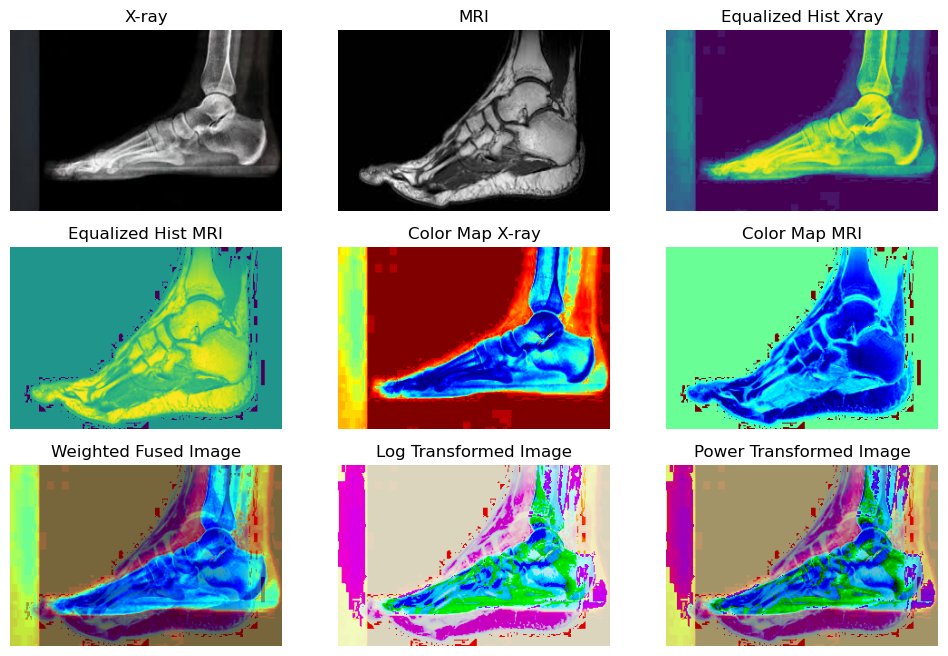

In [2]:
# task 02
xray_image = cv2.imread("task 02_Xray.jpg", cv2.IMREAD_COLOR)
mri_image = cv2.imread("task 02_mri.jpg", cv2.IMREAD_COLOR)
xray = cv2.resize(xray_image, (300, 200))
mri = cv2.resize(mri_image, (300, 200))
plt.figure(figsize=(12, 8))
plt.subplot(3, 3, 1)
plt.title("X-ray")
plt.imshow(xray)
plt.axis("off")

plt.subplot(3, 3, 2)
plt.title("MRI")
plt.imshow(mri)
plt.axis("off")

xray_gray = cv2.cvtColor(xray, cv2.COLOR_BGR2GRAY)
mri_gray = cv2.cvtColor(mri, cv2.COLOR_BGR2GRAY)
eq_xray = cv2.equalizeHist(xray_gray)
eq_mri = cv2.equalizeHist(mri_gray)
plt.subplot(3, 3, 3)
plt.title("Equalized Hist Xray")
plt.imshow(eq_xray)
plt.axis("off")

plt.subplot(3, 3, 4)
plt.title("Equalized Hist MRI")
plt.imshow(eq_mri)
plt.axis("off")

colormap_xray = cv2.applyColorMap(eq_xray, cv2.COLORMAP_JET)
colormap_mri = cv2.applyColorMap(eq_mri, cv2.COLORMAP_JET)
plt.subplot(3, 3, 5)
plt.title("Color Map X-ray")
plt.imshow(colormap_xray)
plt.axis("off")

plt.subplot(3, 3, 6)
plt.title("Color Map MRI")
plt.imshow(colormap_mri)
plt.axis("off")

weight_xray = 0.6
weight_mri = 0.4
fused_image = cv2.addWeighted(colormap_xray, weight_xray, colormap_mri, weight_mri, 0)
plt.subplot(3, 3, 7)
plt.title("Weighted Fused Image")
plt.imshow(fused_image)
plt.axis("off")

c = 255 / np.log(1 + np.max(fused_image))
log_transformed_image = c * np.log(1 + fused_image)
log_transformed_image = np.array(log_transformed_image, dtype=np.uint8)
plt.subplot(3, 3, 8)
plt.title("Log Transformed Image")
plt.imshow(log_transformed_image)
plt.axis("off")

gamma = 3.0
gamma_corrected_image = np.power(log_transformed_image, gamma)
gamma_corrected_image = np.clip(gamma_corrected_image * (255 / np.max(gamma_corrected_image)), 0, 255).astype(np.uint8)
plt.subplot(3, 3, 9)
plt.title("Power Transformed Image")
plt.imshow(gamma_corrected_image)
plt.axis("off")

In [11]:
frame_width = 200
frame_height = 250
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Cannot open camera.")
else:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Cannot capture frame from the camera.")
            break
            
        frame = cv2.resize(frame, (frame_width, frame_height))
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        equalized = cv2.equalizeHist(gray)
        colormap = cv2.applyColorMap(equalized, cv2.COLORMAP_JET)
        colormap_gray = cv2.cvtColor(colormap, cv2.COLOR_BGR2GRAY)
        
        c = 255 / np.log(1 + np.max(colormap_gray))
        log_transformed = c * np.log(1 + colormap_gray)
        log_transformed = np.array(log_transformed, dtype=np.uint8)

        gamma = 0.5
        gamma_corrected = np.power(log_transformed, gamma)
        gamma_corrected = np.clip(gamma_corrected * (255 / np.max(gamma_corrected)), 0, 255).astype(np.uint8)

        cv2.imshow('Camera Feed', frame)
        comparison = np.hstack((gray, equalized, colormap_gray, log_transformed, gamma_corrected))
        cv2.imshow('Comparison', comparison)
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
            
    cap.release()
    cv2.destroyAllWindows()